In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
import scipy.stats as stats

from sklearn.cluster import KMeans
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.metrics import silhouette_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html


In [2]:
data = pd.read_csv('combined_data_15-03.csv', sep=";", header=0)
#data = data.fillna(0)
data = data.dropna()
basedf = data
#data

In [3]:
data = data.drop(labels=["App_time","Left/Right"], axis=1)
data = data.astype('int')
data["App_time"] = basedf["App_time"]
data["Left/Right"] = basedf["Left/Right"]

In [4]:
data1 = data.loc[data["session"] == 1]
data1L = data.loc[data["Left/Right"] == "L"]
data1R = data.loc[data["Left/Right"] == "R"]

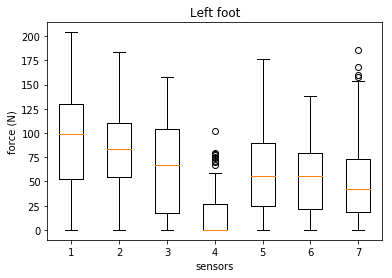

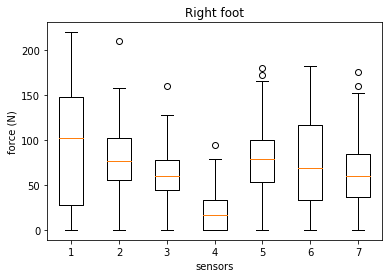

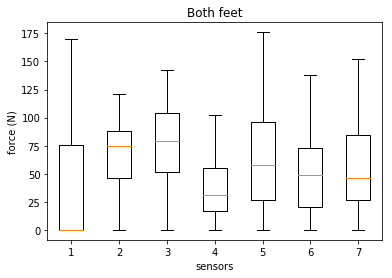

In [5]:
plt.boxplot([data1L["S0_force"],data1L["S1_force"],data1L["S2_force"],data1L["S3_force"],data1L["S4_force"],data1L["S5_force"],data1L["S6_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["S0_force"],data1R["S1_force"],data1R["S2_force"],data1R["S3_force"],data1R["S4_force"],data1R["S5_force"],data1R["S6_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

plt.boxplot([data1["S0_force"],data1["S1_force"],data1["S2_force"],data1["S3_force"],data1["S4_force"],data1["S5_force"],data1["S6_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Both feet')
plt.show()

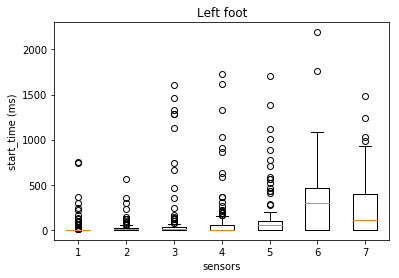

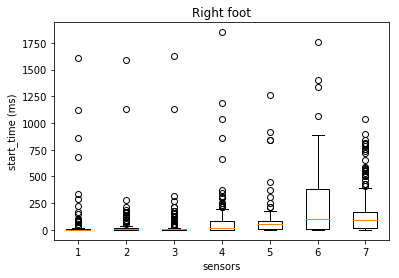

In [6]:
plt.boxplot([data1L["S0_start_time"],data1L["S1_start_time"],data1L["S2_start_time"],data1L["S3_start_time"],data1L["S4_start_time"],data1L["S5_start_time"],data1L["S6_start_time"]])
plt.ylabel('start_time (ms)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["S0_start_time"],data1R["S1_start_time"],data1R["S2_start_time"],data1R["S3_start_time"],data1R["S4_start_time"],data1R["S5_start_time"],data1R["S6_start_time"]])
plt.ylabel('start_time (ms)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

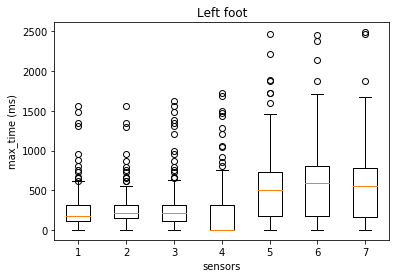

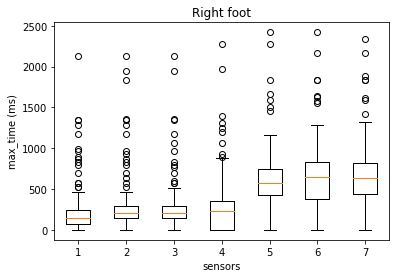

In [7]:
plt.boxplot([data1L["S0_max_time"],data1L["S1_max_time"],data1L["S2_max_time"],data1L["S3_max_time"],data1L["S4_max_time"],data1L["S5_max_time"],data1L["S6_max_time"]])
plt.ylabel('max_time (ms)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["S0_max_time"],data1R["S1_max_time"],data1R["S2_max_time"],data1R["S3_max_time"],data1R["S4_max_time"],data1R["S5_max_time"],data1R["S6_max_time"]])
plt.ylabel('max_time (ms)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

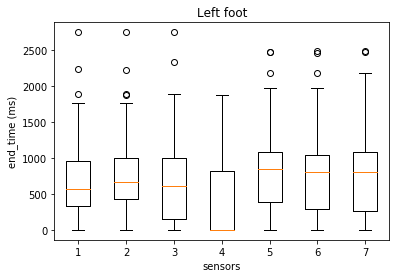

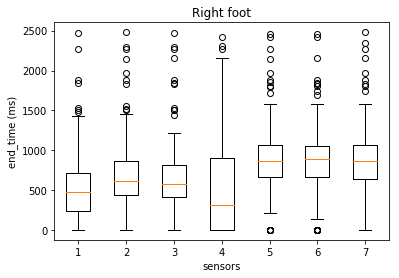

In [8]:
plt.boxplot([data1L["S0_end_time"],data1L["S1_end_time"],data1L["S2_end_time"],data1L["S3_end_time"],data1L["S4_end_time"],data1L["S5_end_time"],data1L["S6_end_time"]])
plt.ylabel('end_time (ms)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["S0_end_time"],data1R["S1_end_time"],data1R["S2_end_time"],data1R["S3_end_time"],data1R["S4_end_time"],data1R["S5_end_time"],data1R["S6_end_time"]])
plt.ylabel('end_time (ms)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

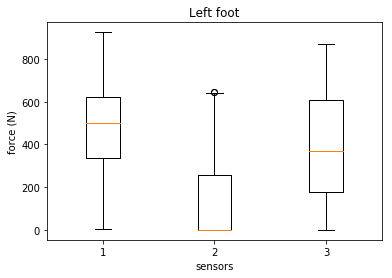

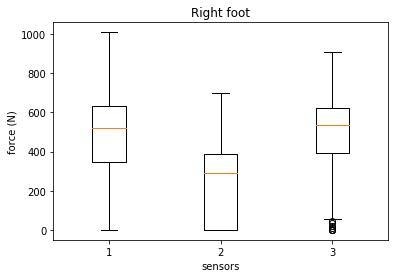

In [9]:
plt.boxplot([data1L["F1_force"],data1L["F2_force"],data1L["F3_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["F1_force"],data1R["F2_force"],data1R["F3_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

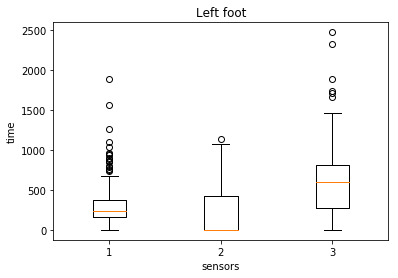

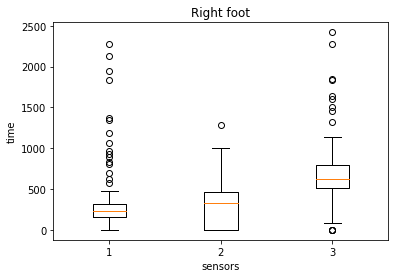

In [10]:
plt.boxplot([data1L["F1_time"],data1L["F2_time"],data1L["F3_time"]])
plt.ylabel('time')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["F1_time"],data1R["F2_time"],data1R["F3_time"]])
plt.ylabel('time')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

In [11]:
pd.DataFrame.describe(data1L)

,Step_number,Insole_timer,Contact_time,S0_force,S0_start_time,S0_max_time,S0_end_time,S1_force,S1_start_time,S1_max_time,...,F1_force,F1_time,F2_force,F2_time,F3_force,F3_time,Warning_code,Size,Insole_id,session
count,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.00000,160.00000,...,160.00000,160.0000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000
mean,27.506250,53774.337500,948.937500,88.08750,24.187500,249.937500,653.687500,86.556250,26.62500,275.43750,...,472.23750,340.1250,157.231250,245.562500,387.506250,615.125000,0.425000,41.862500,5071.037500,2.08750
std,15.992528,39657.869545,475.790764,51.54779,95.716246,261.813936,502.736689,39.255132,63.26432,223.19534,...,197.20259,283.7263,208.587017,283.237676,262.791306,433.628812,1.286358,1.588035,1031.006188,0.80398
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,2.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,3867.000000,1.00000
25%,14.000000,23605.000000,670.000000,53.00000,0.000000,110.000000,330.000000,55.000000,0.00000,150.00000,...,336.25000,160.0000,0.000000,0.000000,176.500000,270.000000,0.000000,40.000000,3867.000000,1.00000
50%,27.000000,46890.000000,950.000000,99.00000,0.000000,180.000000,570.000000,83.500000,10.00000,210.00000,...,499.00000,240.0000,0.000000,0.000000,371.500000,600.000000,0.000000,42.000000,5258.000000,2.00000
75%,40.250000,71535.000000,1212.500000,130.00000,0.000000,310.000000,952.500000,110.500000,20.00000,310.00000,...,622.00000,372.5000,256.000000,430.000000,607.000000,812.500000,0.000000,44.000000,6417.000000,3.00000
max,59.000000,157040.000000,2750.000000,204.00000,750.000000,1560.000000,2750.000000,184.000000,560.00000,1560.00000,...,925.00000,1880.0000,645.000000,1130.000000,870.000000,2470.000000,5.000000,44.000000,6417.000000,3.00000


In [12]:
pd.DataFrame.describe(data1R)

,Step_number,Insole_timer,Contact_time,S0_force,S0_start_time,S0_max_time,S0_end_time,S1_force,S1_start_time,S1_max_time,...,F1_force,F1_time,F2_force,F2_time,F3_force,F3_time,Warning_code,Size,Insole_id,session
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.000000,166.000000,166.00000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,29.319277,52675.915663,914.698795,93.301205,38.855422,223.253012,523.614458,76.680723,37.108434,291.445783,...,482.343373,317.831325,227.174699,264.036145,489.86747,658.734940,0.313253,41.734940,5244.530120,2.090361
std,17.318072,36423.873372,422.634844,68.308611,176.766967,295.504124,433.241701,34.883710,155.216604,322.389309,...,208.946614,349.910978,227.552138,265.686028,200.21596,365.188489,1.132738,1.596089,2710.428526,0.777114
min,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,40.000000,2244.000000,1.000000
25%,15.000000,24860.000000,700.000000,28.250000,0.000000,70.000000,242.500000,55.000000,0.000000,140.000000,...,345.250000,160.000000,0.000000,0.000000,395.50000,510.000000,0.000000,40.000000,2244.000000,1.000000
50%,28.500000,48635.000000,920.000000,102.000000,0.000000,150.000000,480.000000,77.000000,10.000000,210.000000,...,521.500000,230.000000,292.000000,330.000000,535.00000,620.000000,0.000000,42.000000,5820.000000,2.000000
75%,42.000000,71490.000000,1080.000000,147.500000,10.000000,247.500000,717.500000,102.000000,20.000000,290.000000,...,633.250000,317.500000,389.500000,460.000000,625.00000,800.000000,0.000000,44.000000,9004.000000,3.000000
max,66.000000,156018.000000,2480.000000,220.000000,1610.000000,2130.000000,2470.000000,210.000000,1590.000000,2130.000000,...,1010.000000,2270.000000,700.000000,1280.000000,910.00000,2420.000000,5.000000,44.000000,9004.000000,3.000000


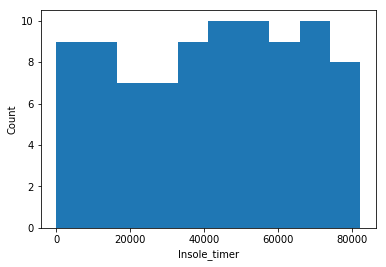

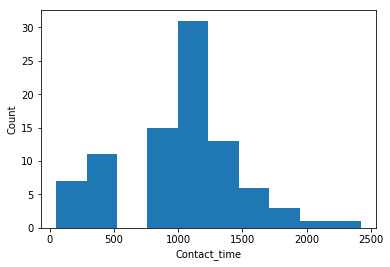

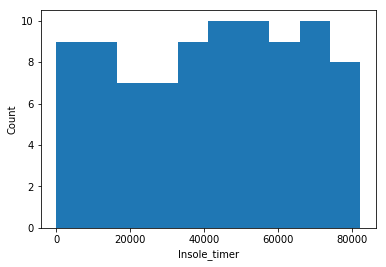

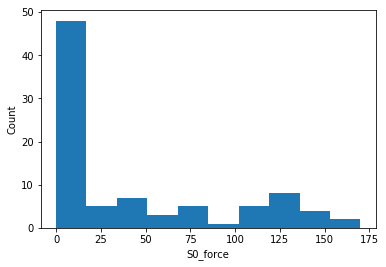

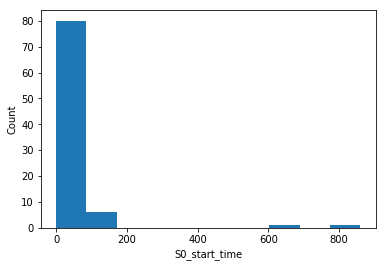

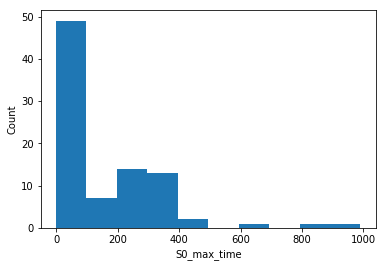

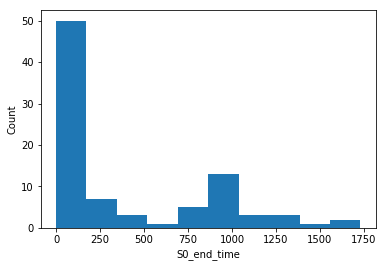

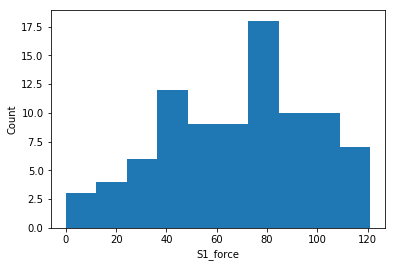

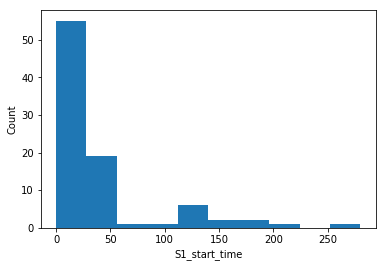

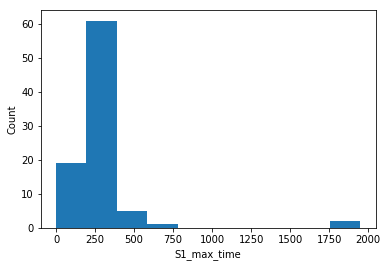

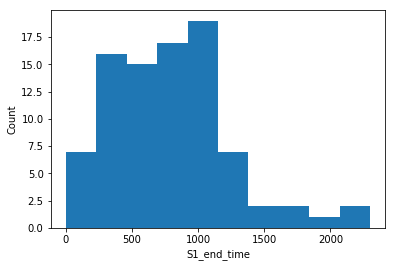

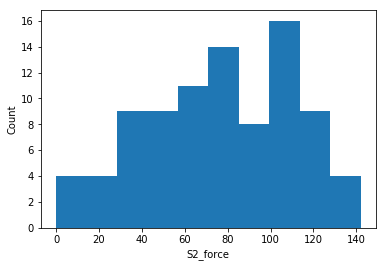

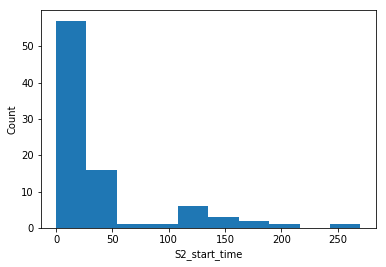

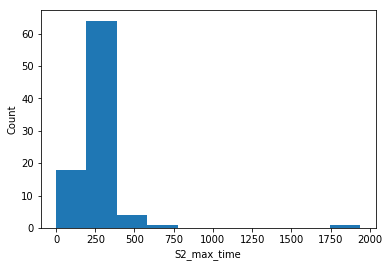

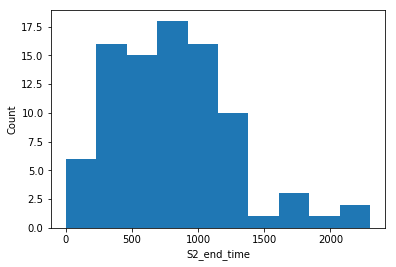

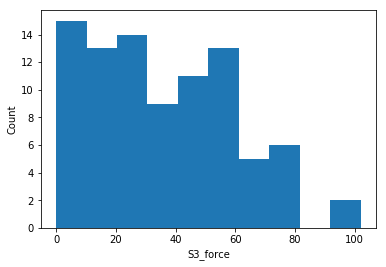

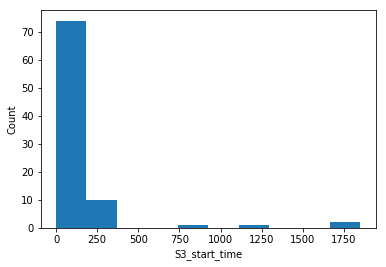

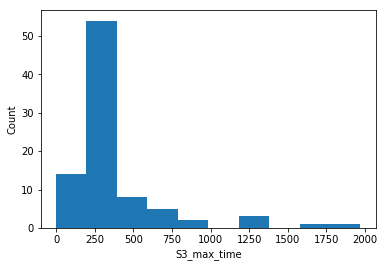

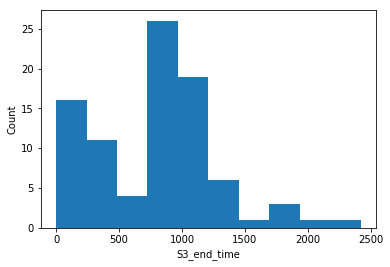

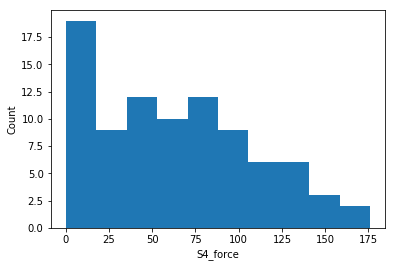

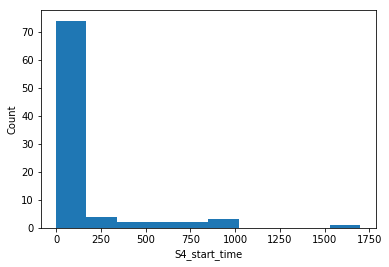

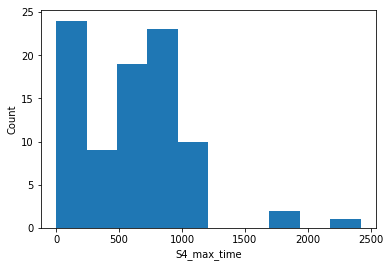

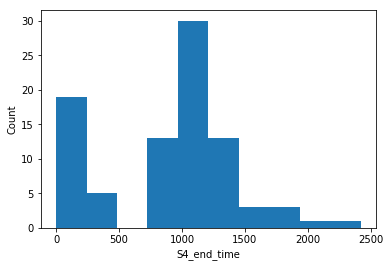

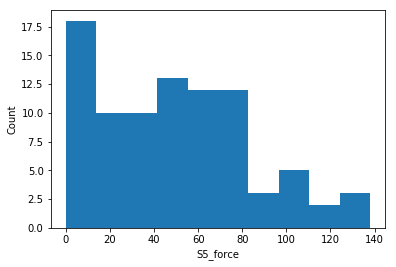

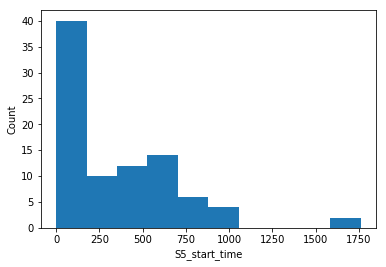

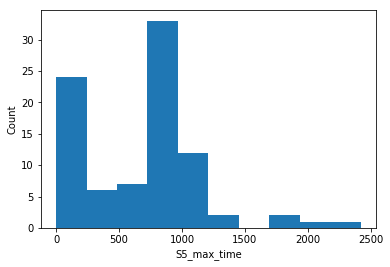

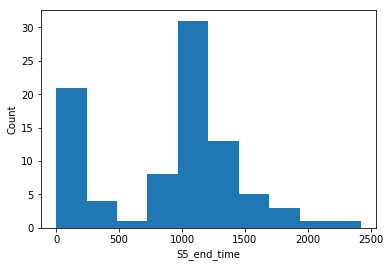

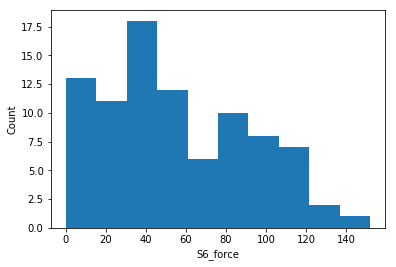

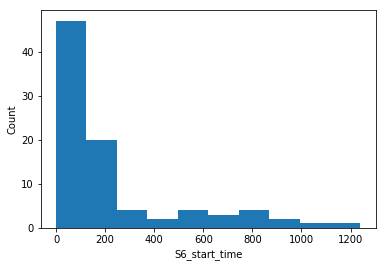

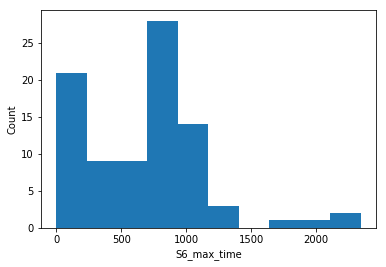

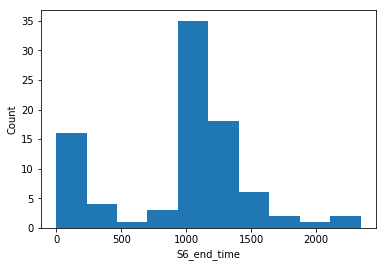

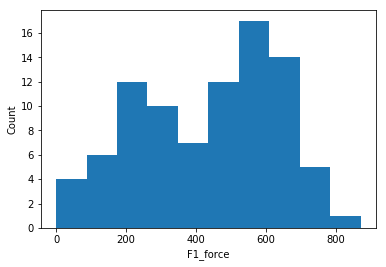

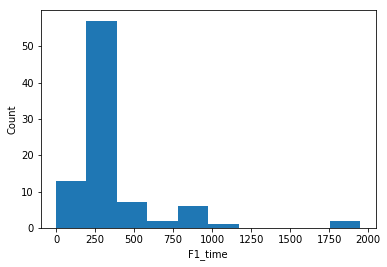

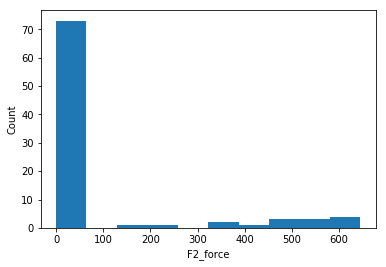

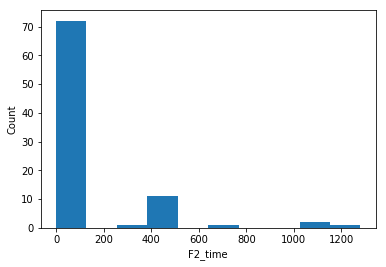

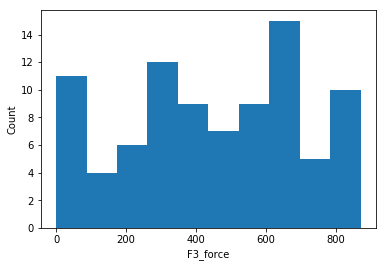

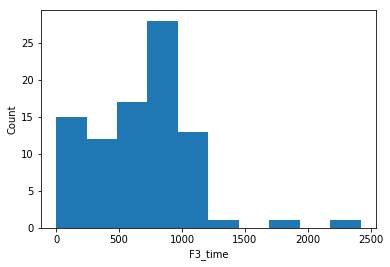

In [13]:
plt.hist(data1["Insole_timer"])
plt.xlabel('Insole_timer')
plt.ylabel('Count')
plt.show()

plt.hist(data1["Contact_time"])
plt.xlabel('Contact_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["Insole_timer"])
plt.xlabel('Insole_timer')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S0_force"])
plt.xlabel('S0_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S0_start_time"])
plt.xlabel('S0_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S0_max_time"])
plt.xlabel('S0_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S0_end_time"])
plt.xlabel('S0_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S1_force"])
plt.xlabel('S1_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S1_start_time"])
plt.xlabel('S1_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S1_max_time"])
plt.xlabel('S1_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S1_end_time"])
plt.xlabel('S1_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S2_force"])
plt.xlabel('S2_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S2_start_time"])
plt.xlabel('S2_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S2_max_time"])
plt.xlabel('S2_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S2_end_time"])
plt.xlabel('S2_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S3_force"])
plt.xlabel('S3_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S3_start_time"])
plt.xlabel('S3_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S3_max_time"])
plt.xlabel('S3_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S3_end_time"])
plt.xlabel('S3_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S4_force"])
plt.xlabel('S4_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S4_start_time"])
plt.xlabel('S4_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S4_max_time"])
plt.xlabel('S4_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S4_end_time"])
plt.xlabel('S4_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S5_force"])
plt.xlabel('S5_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S5_start_time"])
plt.xlabel('S5_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S5_max_time"])
plt.xlabel('S5_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S5_end_time"])
plt.xlabel('S5_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S6_force"])
plt.xlabel('S6_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S6_start_time"])
plt.xlabel('S6_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S6_max_time"])
plt.xlabel('S6_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S6_end_time"])
plt.xlabel('S6_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F1_force"])
plt.xlabel('F1_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F1_time"])
plt.xlabel('F1_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F2_force"])
plt.xlabel('F2_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F2_time"])
plt.xlabel('F2_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F3_force"])
plt.xlabel('F3_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F3_time"])
plt.xlabel('F3_time')
plt.ylabel('Count')
plt.show()


In [14]:

#"Insole_timer"
values_cols = ["Contact_time","S0_force","S0_start_time","S0_max_time","S0_end_time","S1_force",
               "S1_start_time","S1_max_time","S2_force","S2_start_time","S2_max_time","S2_end_time",
               "S3_force","S3_start_time","S3_max_time","S3_end_time","S4_force","S4_start_time",
               "S4_max_time","S4_end_time","S5_force","S5_start_time","S5_max_time","S5_end_time",
               "S6_force","S6_start_time","S6_max_time","S6_end_time","F1_force","F1_time","F2_force",
               "F2_time","F3_force","F3_time"]

force_cols = ["S0_force","S1_force","S2_force","S3_force","S4_force","S5_force","S6_force"]
startT_cols = ["S0_start_time","S1_start_time","S2_start_time","S3_start_time","S4_start_time","S5_start_time","S6_start_time"]
maxT_cols = ["S0_max_time","S1_max_time","S2_max_time","S3_max_time","S4_max_time","S5_max_time","S6_max_time"]
endT_cols = ["S0_end_time","S1_end_time","S2_end_time","S3_end_time","S4_end_time","S5_end_time","S6_end_time"]


In [15]:
values1L = data1L
values1R = data1R

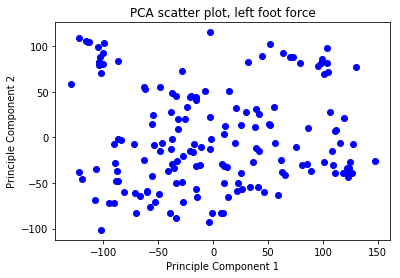

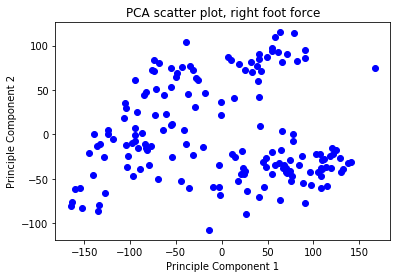

In [16]:
valuesL = data1L.loc[:,force_cols]
valuesR = data1R.loc[:,force_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c="b")
plt.title("PCA scatter plot, left foot force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c="b")
plt.title("PCA scatter plot, right foot force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

k = 2 :  0.473
k = 3 :  0.39
k = 4 :  0.386
k = 5 :  0.343
k = 6 :  0.347
k = 7 :  0.405
k = 8 :  0.366
k = 9 :  0.401
k = 10 :  0.385

Best k= 2
Best silhouette score= 0.473


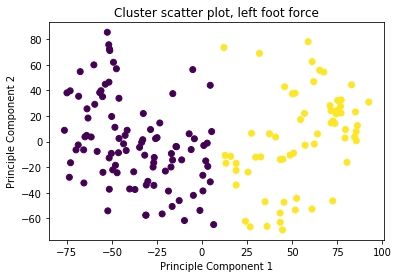

k = 2 :  0.568
k = 3 :  0.508
k = 4 :  0.408
k = 5 :  0.401
k = 6 :  0.381
k = 7 :  0.35
k = 8 :  0.349
k = 9 :  0.321
k = 10 :  0.301

Best k= 2
Best silhouette score= 0.568


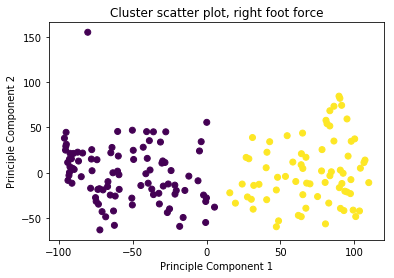

In [17]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

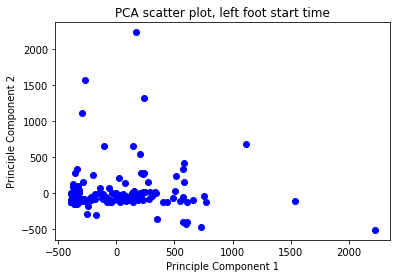

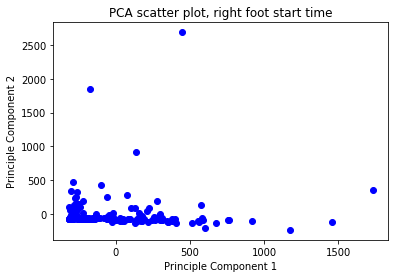

In [18]:
valuesL = data1L.loc[:,startT_cols]
valuesR = data1R.loc[:,startT_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c="b")
plt.title("PCA scatter plot, left foot start time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c="b")
plt.title("PCA scatter plot, right foot start time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

k = 2 :  0.387
k = 3 :  0.388
k = 4 :  0.441
k = 5 :  0.486
k = 6 :  0.486
k = 7 :  0.498
k = 8 :  0.505
k = 9 :  0.396
k = 10 :  0.396

Best k= 8
Best silhouette score= 0.505


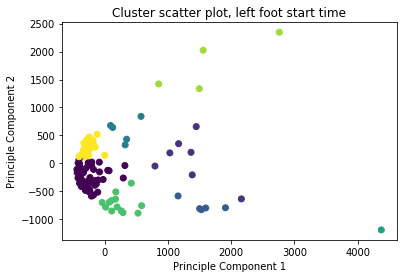

k = 2 :  0.532
k = 3 :  0.506
k = 4 :  0.502
k = 5 :  0.538
k = 6 :  0.459
k = 7 :  0.456
k = 8 :  0.394
k = 9 :  0.465
k = 10 :  0.412

Best k= 5
Best silhouette score= 0.538


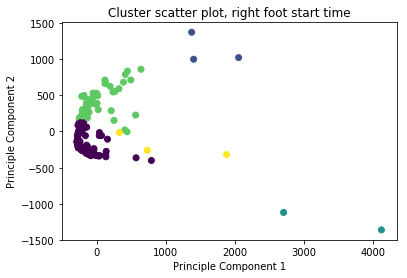

In [19]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot start time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot start time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

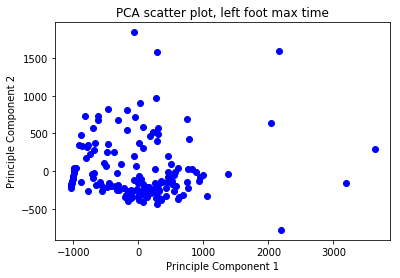

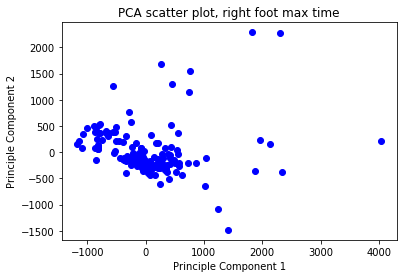

In [20]:
valuesL = data1L.loc[:,maxT_cols]
valuesR = data1R.loc[:,maxT_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c="b")
plt.title("PCA scatter plot, left foot max time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c="b")
plt.title("PCA scatter plot, right foot max time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

k = 2 :  0.359
k = 3 :  0.463
k = 4 :  0.445
k = 5 :  0.406
k = 6 :  0.418
k = 7 :  0.388
k = 8 :  0.346
k = 9 :  0.337
k = 10 :  0.369

Best k= 3
Best silhouette score= 0.463


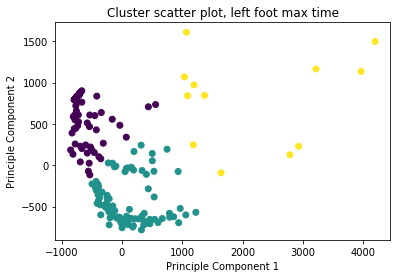

k = 2 :  0.663
k = 3 :  0.475
k = 4 :  0.505
k = 5 :  0.456
k = 6 :  0.473
k = 7 :  0.447
k = 8 :  0.44
k = 9 :  0.425
k = 10 :  0.44

Best k= 2
Best silhouette score= 0.663


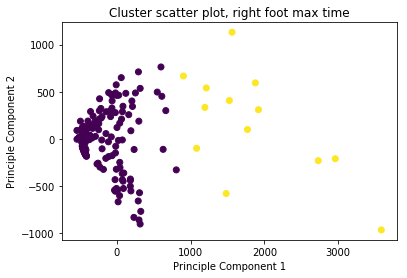

In [21]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot max time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot max time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

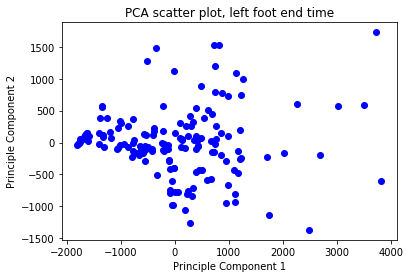

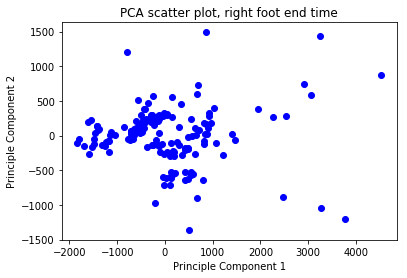

In [22]:
valuesL = data1L.loc[:,endT_cols]
valuesR = data1R.loc[:,endT_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c="b")
plt.title("PCA scatter plot, left foot end time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c="b")
plt.title("PCA scatter plot, right foot end time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

k = 2 :  0.419
k = 3 :  0.487
k = 4 :  0.413
k = 5 :  0.351
k = 6 :  0.352
k = 7 :  0.379
k = 8 :  0.37
k = 9 :  0.385
k = 10 :  0.384

Best k= 3
Best silhouette score= 0.487


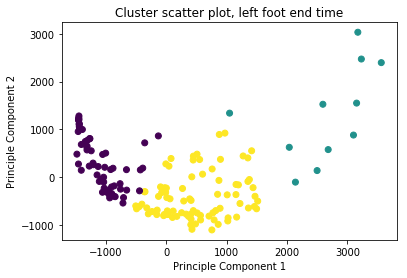

k = 2 :  0.469
k = 3 :  0.488
k = 4 :  0.521
k = 5 :  0.468
k = 6 :  0.451
k = 7 :  0.45
k = 8 :  0.421
k = 9 :  0.408
k = 10 :  0.397

Best k= 4
Best silhouette score= 0.521


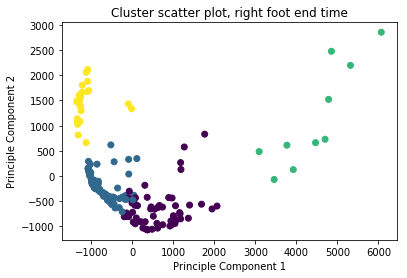

In [23]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot end time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot end time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

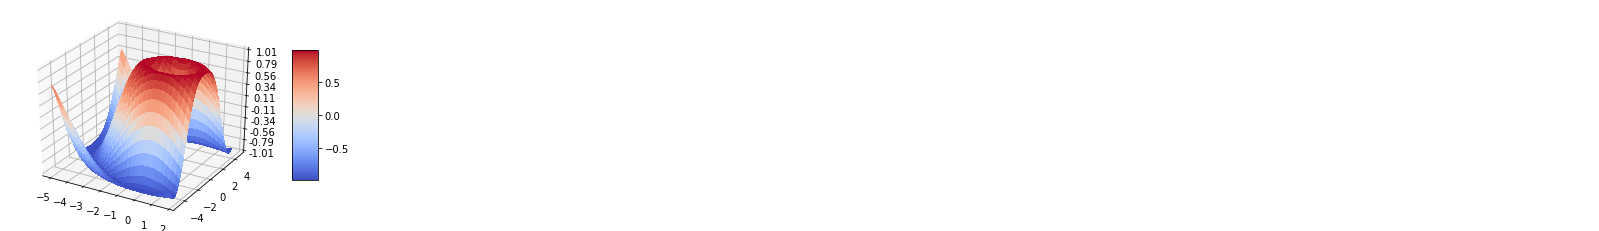

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#3d heatmap example

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 2, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.6, aspect=5)

plt.show()

